In [3]:
## Importing packages
library(datasets)
library(tidyverse) 
library(caret)
library(grid)
library(gridExtra)
library(GGally)
library(rpart)
library(rpart.plot)
library(corrplot)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.3     v purrr   0.3.2
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwr

In [6]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [7]:
dataset=read.csv ("playgolf.csv", header =T,na.strings ="?")
head(dataset)

Outlook,Temp,Humidity,Windy,Play.Golf
Rainy,Hot,High,False,No
Rainy,Hot,High,True,No
Overcast,Hot,High,False,Yes
Sunny,Mild,High,False,Yes
Sunny,Cool,Normal,False,Yes
Sunny,Cool,Normal,True,No


In [8]:
# CART Modeling via rpart
treeFit <- rpart(Play.Golf~.,data=dataset,method = 'class', control = rpart.control(minsplit=1), parms=list(split='information'))
print(treeFit)

n= 14 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 14 5 Yes (0.3571429 0.6428571)  
   2) Outlook=Rainy,Sunny 10 5 No (0.5000000 0.5000000)  
     4) Humidity=High 5 1 No (0.8000000 0.2000000)  
       8) Outlook=Rainy 3 0 No (1.0000000 0.0000000) *
       9) Outlook=Sunny 2 1 No (0.5000000 0.5000000)  
        18) Windy=True 1 0 No (1.0000000 0.0000000) *
        19) Windy=False 1 0 Yes (0.0000000 1.0000000) *
     5) Humidity=Normal 5 1 Yes (0.2000000 0.8000000)  
      10) Windy=True 2 1 No (0.5000000 0.5000000)  
        20) Outlook=Sunny 1 0 No (1.0000000 0.0000000) *
        21) Outlook=Rainy 1 0 Yes (0.0000000 1.0000000) *
      11) Windy=False 3 0 Yes (0.0000000 1.0000000) *
   3) Outlook=Overcast 4 0 Yes (0.0000000 1.0000000) *


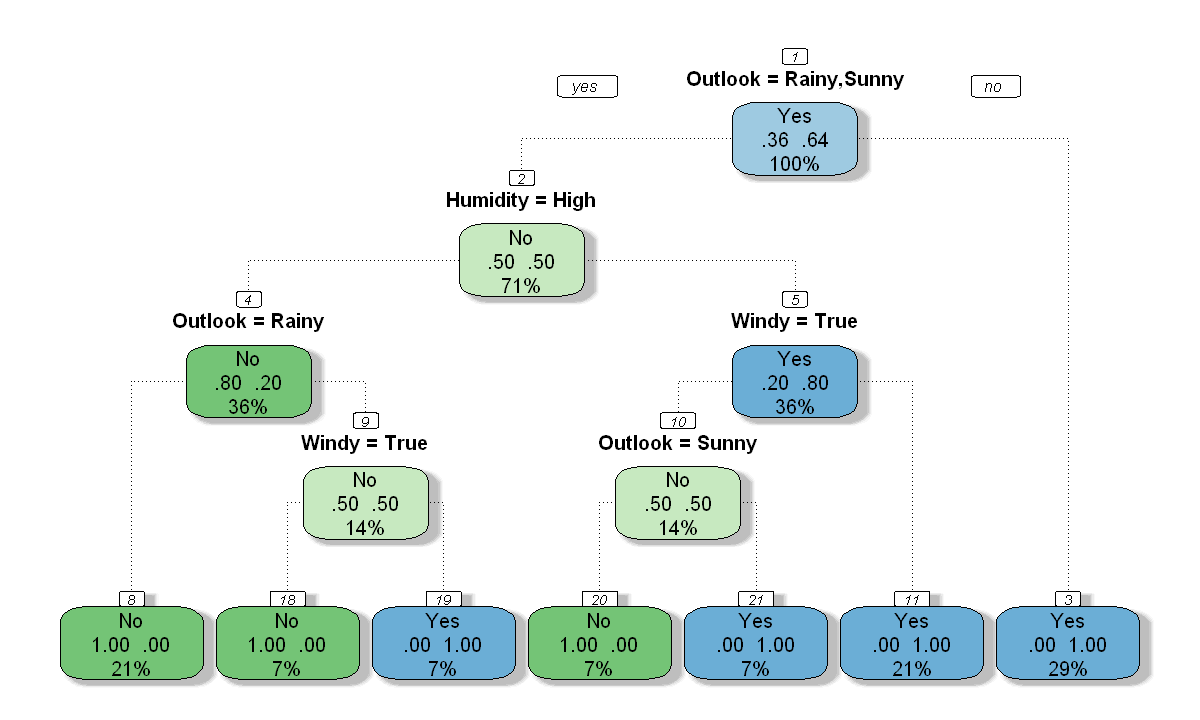

In [9]:
fig(10, 6)
rattle::fancyRpartPlot(treeFit, type = 1, sub = "")

In [6]:
# test Case 
# Obtain a prediction for the day <Sunny, cool, High, True>

test_case <- data.frame(Outlook="Sunny",Temp="Cool", Humidity="High",Windy="True")

# run predicion on test case
Prediction1 <- predict(treeFit,newdata=test_case,type = 'class')
Prediction1

1 
No 
Levels: No Yes